<a href="https://colab.research.google.com/github/2303a51154/AIML-2025BT17/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

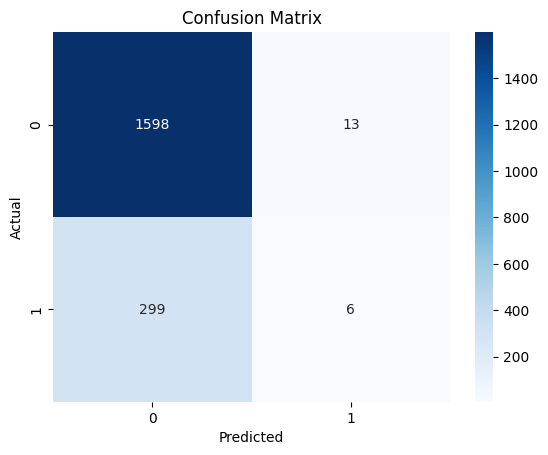

Accuracy: 0.84


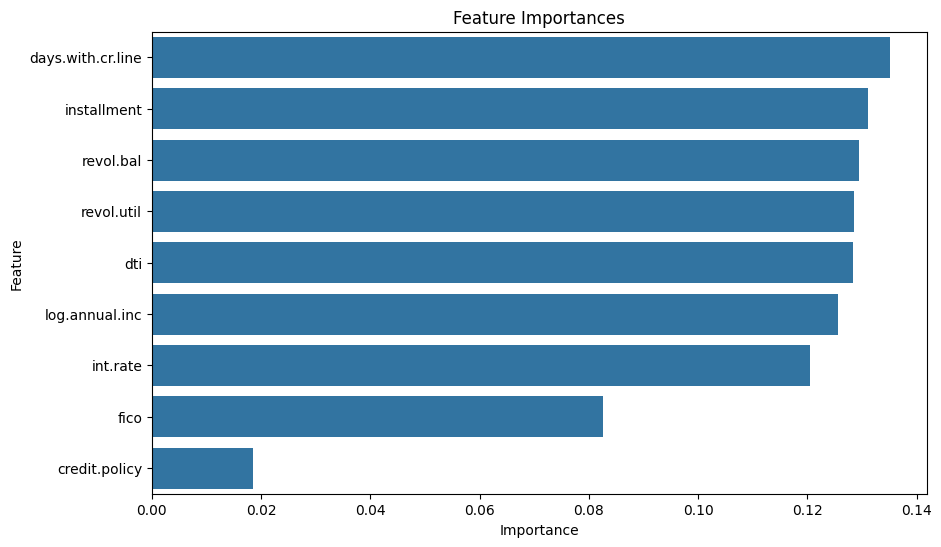

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
data = pd.read_csv('/content/loan_data.csv')
print(data.head())
print(data.isnull().sum())
data.dropna(inplace=True)
features = data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
                  'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']]
target = data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


Data Types:
 credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object
Summary Statistics:
        credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665

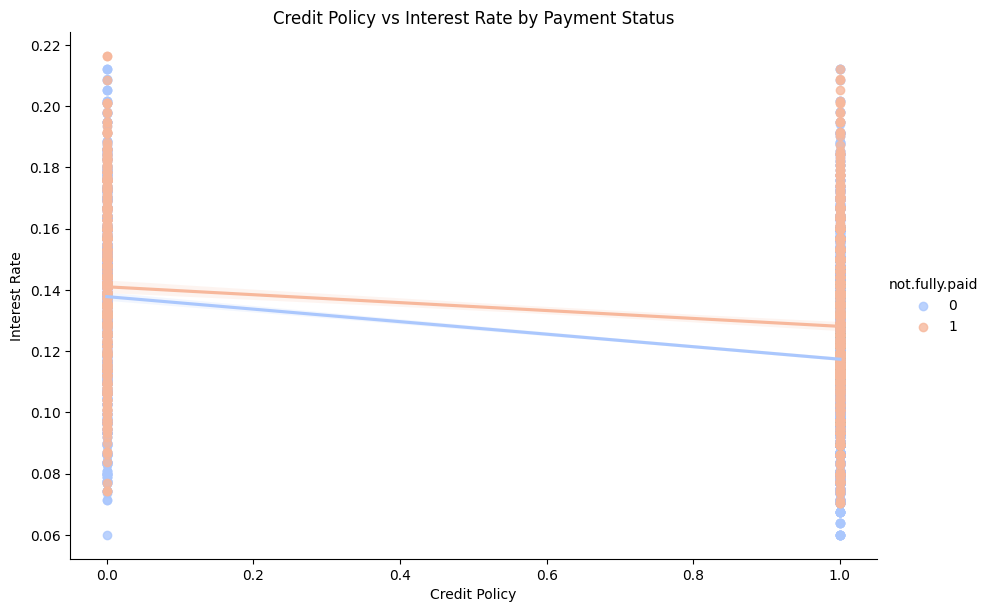

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/loan_data.csv')
data_types = data.dtypes
print("Data Types:\n", data_types)
summary_stats = data.describe(percentiles=[.25, .5, .75, .90])
print("Summary Statistics:\n", summary_stats)
column_names = data.columns.tolist()
print("Column Names:\n", column_names)
credit_approvals_count = data['credit.policy'].value_counts()
print("Credit Approvals Count:\n", credit_approvals_count)
sns.lmplot(x='credit.policy', y='int.rate', hue='not.fully.paid', data=data,
           palette='coolwarm', height=6, aspect=1.5)
plt.title('Credit Policy vs Interest Rate by Payment Status')
plt.xlabel('Credit Policy')
plt.ylabel('Interest Rate')
plt.show()

In [ ]:
# Step 1: Load the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/loan_data.csv')  # Replace with your dataset path

# Step 2: Check the unique values of the 'purpose' feature
print("Unique values in 'purpose':", data['purpose'].unique())

# Step 3: Categorize the 'purpose' feature using one-hot encoding
data_dummies = pd.get_dummies(data, columns=['purpose'], drop_first=True)

# Step 4: Prepare the features and target variable
# Assuming 'not.fully.paid' is the target variable
features = data_dummies.drop('not.fully.paid', axis=1)
target = data_dummies['not.fully.paid']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 6: Display the shape of the datasets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


Unique values in 'purpose': ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
Training set shape: (7662, 18), (7662,)
Testing set shape: (1916, 18), (1916,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
data = pd.read_csv('/content/loan_data.csv')
data_dummies = pd.get_dummies(data, columns=['purpose'], drop_first=True)

X = data_dummies.drop('not.fully.paid', axis=1)
Y = data_dummies['not.fully.paid']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, Y_train)

# Step 6: Make Predictions
Y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the Model
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.53      0.03      0.05       305

    accuracy                           0.84      1916
   macro avg       0.69      0.51      0.48      1916
weighted avg       0.79      0.84      0.78      1916

Confusion Matrix:
 [[1604    7]
 [ 297    8]]
Accuracy: 0.84


Confusion Matrix:
 [[1604    7]
 [ 297    8]]


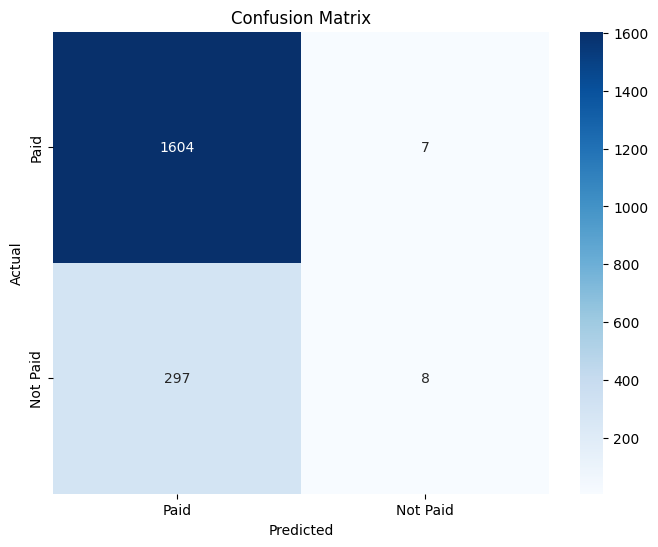

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.53      0.03      0.05       305

    accuracy                           0.84      1916
   macro avg       0.69      0.51      0.48      1916
weighted avg       0.79      0.84      0.78      1916

Accuracy: 0.84


In [ ]:
# Step 1: Import Required Libraries (if not already done)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess the Dataset (if not already done)
data = pd.read_csv('/content/loan_data.csv')  # Replace with your dataset path
data_dummies = pd.get_dummies(data, columns=['purpose'], drop_first=True)
X = data_dummies.drop('not.fully.paid', axis=1)
Y = data_dummies['not.fully.paid']

# Step 3: Split the Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Apply the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Step 5: Make Predictions
Y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the Model

# 1. Generate the Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Paid', 'Not Paid'], yticklabels=['Paid', 'Not Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. Generate the Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)

# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
